In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = 'combine.csv'

df = pd.read_csv(data, sep=';')

In [2]:
print(df.columns)

Index(['Année', 'Numéro', 'Département', 'Code INSEE', 'Nom de la commune',
       'Date de première alerte', 'Origine de l'alerte',
       'Moyens de première intervention', 'Surface parcourue (m2)',
       'Surface forêt (m2)', 'Surface maquis garrigues (m2)',
       'Autres surfaces naturelles hors forêt (m2)', 'Surfaces agricoles (m2)',
       'Autres surfaces (m2)', 'Surface autres terres boisées (m2)',
       'Surfaces non boisées naturelles (m2)',
       'Surfaces non boisées artificialisées (m2)',
       'Surfaces non boisées (m2)', 'Précision des surfaces',
       'Surface de feu à l'arrivée des secours > 0,1 ha',
       'Voie carrossable la plus proche',
       'Activité ou habitation la plus proche', 'Type de peuplement',
       'Connaissance', 'Source de l'enquête', 'Nature',
       'Intervention de l'équipe RCCI', 'Décès ou bâtiments touchés',
       'Nombre de décès', 'Nombre de bâtiments totalement détruits',
       'Nombre de bâtiments partiellement détruits', 'Hygromét

In [3]:
df["Origine de l'alerte"].unique()

array(['Indéterminé', 'Population', 'Autre', 'Pompiers pré-positionnés',
       'Patrouille', 'Moyen aérien', 'Vigie-caméra'], dtype=object)

## Comparaison 2006 / 2022 départements brulés

In [4]:
df_2006 = df[df['Année']==2006]

In [5]:
surface_totale2006 = df_2006['Surface parcourue (m2)'].sum()

In [6]:
df_grouped = df_2006.groupby('Département').sum('Surface parcourue (m2)').reset_index()

df_grouped = df_grouped.sort_values(by='Surface parcourue (m2)', ascending=False)

df_grouped['Part'] = df_grouped['Surface parcourue (m2)'] / surface_totale2006
df_grouped = df_grouped.head(25)

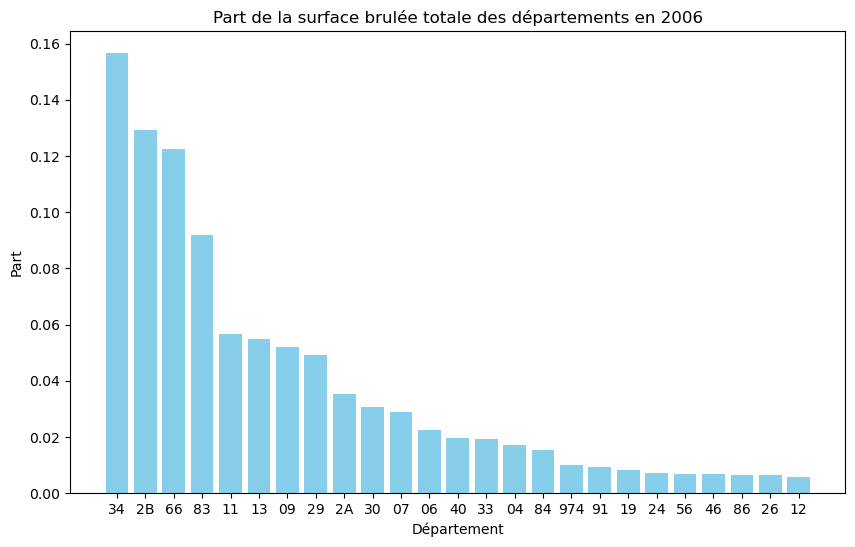

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(df_grouped['Département'], df_grouped['Part'], color='skyblue')

# Ajouter des labels et un titre
plt.xlabel('Département')
plt.ylabel('Part')
plt.title('Part de la surface brulée totale des départements en 2006')

# Afficher le diagramme
plt.show()

In [11]:
df_2022 = df[df['Année']==2022]

In [12]:
surface_totale2022 = df_2022['Surface parcourue (m2)'].sum()

In [13]:
df_grouped2 = df_2022.groupby('Département').sum('Surface parcourue (m2)').reset_index()

In [14]:
df_grouped2 = df_grouped2.sort_values(by='Surface parcourue (m2)', ascending=False)

In [15]:
df_grouped2['Part'] = df_grouped2['Surface parcourue (m2)'] / surface_totale2022
df_grouped2 = df_grouped2.head(25)

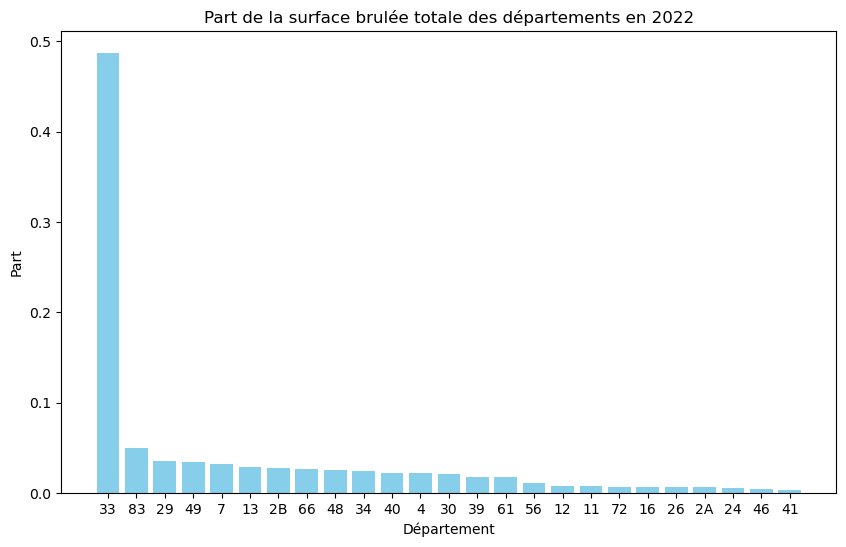

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(df_grouped2['Département'], df_grouped2['Part'], color='skyblue')

# Ajouter des labels et un titre
plt.xlabel('Département')
plt.ylabel('Part')
plt.title('Part de la surface brulée totale des départements en 2022')

# Afficher le diagramme
plt.show()

## Evolution du nombre de feux au fil des année

In [17]:
df_nombre_feux = df.groupby(['Année']).size().reset_index(name='nombre de feux')

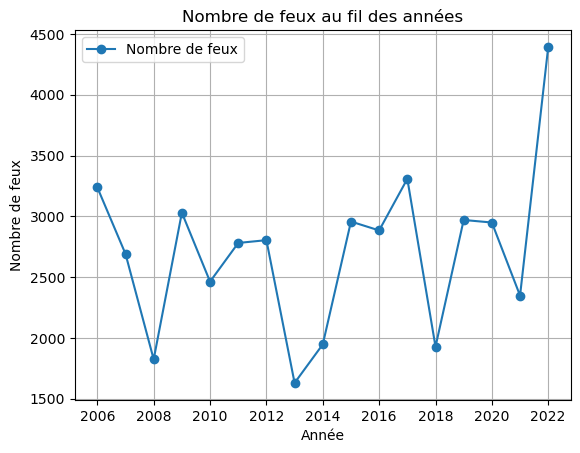

In [18]:
plt.plot(df_nombre_feux['Année'], df_nombre_feux['nombre de feux'], marker='o', linestyle='-')

# Ajouter des titres et des libellés aux axes
plt.title('Nombre de feux au fil des années')
plt.xlabel('Année')
plt.ylabel('Nombre de feux')

# Afficher la légende
plt.legend(['Nombre de feux'])

# Afficher le graphe
plt.grid(True)
plt.show()


## Nombre de départements touchés par les feux

In [19]:
result = df.groupby('Année')['Département'].nunique()

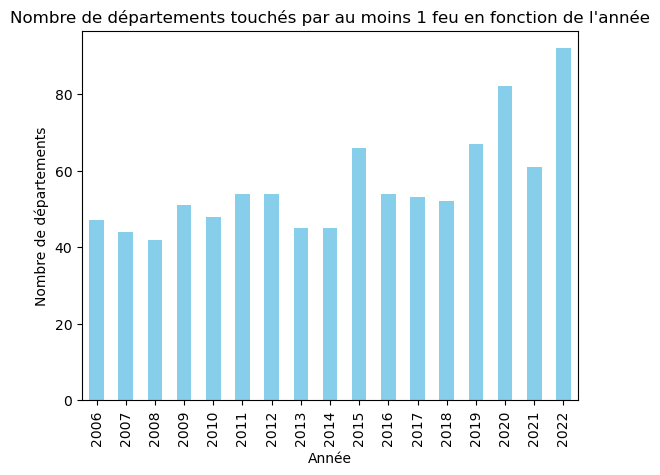

In [20]:
result.plot(kind='bar', color='skyblue')

# Ajouter des titres et des labels d'axe
plt.title('Nombre de départements touchés par au moins 1 feu en fonction de l\'année')
plt.xlabel('Année')
plt.ylabel('Nombre de départements')

# Afficher le graphe
plt.show()

## Nombre de grands feux

In [21]:
df_grands_feux = df[df['Surface parcourue (m2)'] > 100*10000]

In [22]:
result2 = df_grands_feux.groupby('Année')['Département'].nunique()

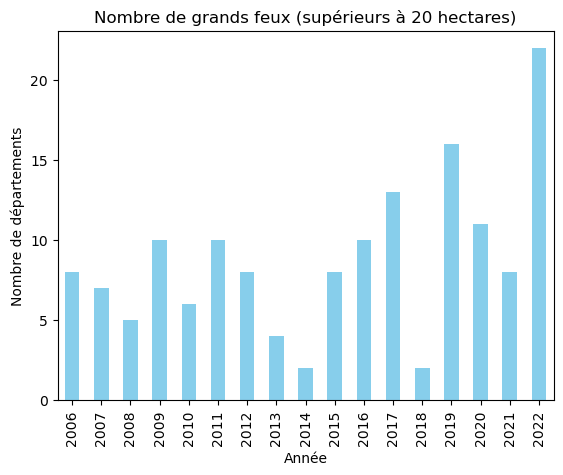

In [24]:
result2.plot(kind='bar', color='skyblue')

# Ajouter des titres et des labels d'axe
plt.title('Nombre de grands feux (supérieurs à 20 hectares)')
plt.xlabel('Année')
plt.ylabel('Nombre de départements')

# Afficher le graphe
plt.show()

## Moyens d'alerte

In [7]:
df_alerte = df[df["Origine de l'alerte"].isin(['Pompiers pré-positionnés', 'Patrouille', 'Moyen aérien', 'Vigie-caméra'])]

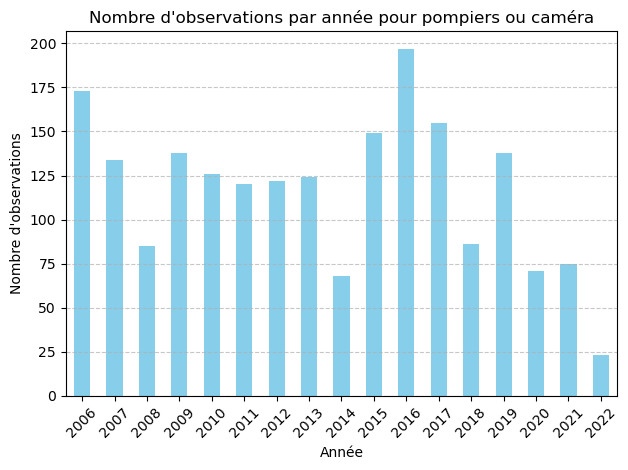

In [9]:
grouped_df = df_alerte.groupby('Année').size()

# Tracer le résultat
grouped_df.plot(kind='bar', color='skyblue')
plt.xlabel('Année')
plt.ylabel('Nombre d\'observations')
plt.title('Nombre d\'observations par année pour pompiers ou caméra')
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [56]:
df_alerte2 = df[df["Origine de l'alerte"]!='Indéterminé']

In [57]:
df_alerte2["Origine de l'alerte"]

985      Population
986      Population
987      Population
988      Population
989      Population
            ...    
46082    Population
46083    Population
46084    Population
46085    Population
46086    Population
Name: Origine de l'alerte, Length: 19578, dtype: object

In [58]:
def categorie(origine):
    if (origine == 'Population') or (origine== 'Autre'):
        return 0
    else:
        return 1

In [59]:
df_alerte2['cat']=df_alerte2["Origine de l'alerte"].apply(categorie)

/tmp/ipykernel_252/1060039913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alerte2['cat']=df_alerte2["Origine de l'alerte"].apply(categorie)


In [60]:
df_alerte2['cat']

985      0
986      0
987      0
988      0
989      0
        ..
46082    0
46083    0
46084    0
46085    0
46086    0
Name: cat, Length: 19578, dtype: int64

In [61]:
result = df_alerte2.groupby(['Année', 'cat']).size().unstack(fill_value=0)

In [62]:
result['total']=result.apply(lambda row: row[0]+row[1], axis=1)

In [64]:
result[1] = result[1] / result['total']
result[0] = result[0] / result['total']

In [66]:
result['total']=result.apply(lambda row: row[0]+row[1], axis=1)

In [68]:
result

cat,0,1,total
Année,,,
2006,0.898890,0.101110,1.0
2007,0.925056,0.074944,1.0
2008,0.924712,0.075288,1.0
2009,0.917217,0.082783,1.0
2010,0.894825,0.105175,1.0
2011,0.912023,0.087977,1.0
2012,0.909361,0.090639,1.0
2013,0.840206,0.159794,1.0
2014,0.906722,0.093278,1.0


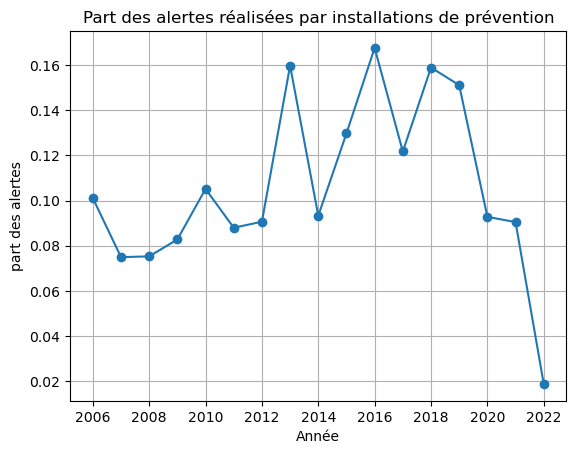

In [75]:
plt.plot(result.index.tolist(), result[1], marker='o', linestyle='-')

# Ajouter des titres et des libellés aux axes
plt.title('Part des alertes réalisées par installations de prévention')
plt.xlabel('Année')
plt.ylabel('part des alertes')


# Afficher le graphe
plt.grid(True)
plt.show()